<a href="https://colab.research.google.com/github/imabari/ImabariScraping/blob/master/%E6%84%9B%E5%AA%9B%E7%9C%8C%E8%AD%A6%E3%81%AE%E4%B8%8D%E5%AF%A9%E8%80%85%E6%83%85%E5%A0%B1%E3%82%92%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# フォントのインストール

In [1]:
!apt-get -y install fonts-ipafont-gothic

# フォントのインストール終了後再起動する
# メニューの「ランタイム」から「ランタイムを再起動」を選択する

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 0s (28.7 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 132684 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ipa

# matplotの日本語設定

In [1]:
!pip install japanize_matplotlib

In [0]:
import datetime
import numpy as np
import pandas as pd

import japanize_matplotlib
import matplotlib.pyplot as plt

# スクレイピング

In [0]:
# 2019年
dfs = pd.read_html("https://www.police.pref.ehime.jp/fushinsha.htm", header=0)

df_2019 = dfs[2]

In [0]:
# 2018年
dfs = pd.read_html("https://www.police.pref.ehime.jp/fushinsha30.htm", header=0)

df_2018 = dfs[1]

In [0]:
# 2017年
dfs = pd.read_html("https://www.police.pref.ehime.jp/fushinsha29.htm", header=0)

df_2017 = dfs[1]

In [0]:
# 結合
df = pd.concat([df_2019, df_2018, df_2017])

In [7]:
# データ確認
df.head(10)

,概 要,備考
0,（松山東署管内） ◆種別：声かけ ◆日時：令和元年11月５日（火）午後３時05分ころ ◆場所...,NaN
1,（新居浜署管内） ◆種別：身体露出 ◆日時：令和元年11月４日（月）午後４時00分ころ ◆場...,NaN
2,（新居浜署管内） ◆種別：不審者 ◆日時：令和元年10月31日（木）午後７時00分ころ ◆場...,NaN
3,（松山西署管内） ◆種別：声かけ ◆日時：令和元年10月31日（木）午後４時00分ころ ◆場...,NaN
4,（四国中央署管内） ◆種別：つきまとい ◆日時：令和元年10月31日（木）午後３時10分ころ...,NaN
5,（宇和島署管内） ◆種別：声かけ ◆日時：令和元年10月29日（火）午後５時20分ころ ◆場...,解決
6,（松山西署管内） ◆種別：つきまとい ◆日時：令和元年10月28日（月）午後３時00分ころ ...,NaN
7,（松山西署管内） ◆種別：写真撮影 ◆日時：令和元年10月28日（月）午後３時00分ころ ◆...,NaN
8,（松山西署管内） ◆種別：つきまとい ◆日時：令和元年10月26日（土）午後０時40分ころ ...,NaN
9,（愛南署管内） ◆種別：声かけ ◆日時：令和元年10月25日（金）午後５時ころ ◆場所：南宇...,NaN


# 前処理

## 概要から内容を分割

In [0]:
# 概要から抽出
df1 = df["概　要"].str.extract("[(（](.+)[）)].*◆.+：(.+)◆.+：(.+)◆.+：(.+)◆.+：(.+)")

In [9]:
# 欠損値の個数確認
df1.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [10]:
# 欠損値のデータ確認
df[df1.isnull().all(axis=1)]

,概 要,備考


In [0]:
# 前後の空白文字を削除
df1 = df1.apply(lambda x: x.str.strip())

# 文字を正規化
df1 = df1.apply(lambda x: x.str.normalize("NFKC"))

In [0]:
# 列名
df1.rename(columns={0: "管轄署", 1: "種別", 2: "日時", 3: "場所", 4: "状況"}, inplace=True)

## 内容調整

In [0]:
# 平成29年度のみ
df1["日時"] = df1["日時"].str.replace("ころの", "")
df1["日時"] = df1["日時"].str.replace("分分", "分")

In [0]:
# 種別の等を除去
df1["種別"] = df1["種別"].str.replace("等", "")

In [0]:
# 管内
df1["管轄署"] = df1["管轄署"].str.replace("管内", "署")
df1["管轄署"] = df1["管轄署"].str.replace("署署", "署")

In [16]:
# データ確認
df1.head()

,管轄署,種別,日時,場所,状況
0,松山東署,声かけ,令和元年11月5日(火)午後3時05分ころ,松山市千舟町4丁目付近路上,青色ジーンズ、茶色ニット帽着用、無精ひげあり)に「リーダーは誰だ。リーダーは包丁で刺されるぞ...
1,新居浜署,身体露出,令和元年11月4日(月)午後4時00分ころ,新居浜市西の土居町2丁目付近路上,女性が歩行中、歩きながら下半身を露出しようとしている男(50〜70歳位、身長160センチ位、...
2,新居浜署,不審者,令和元年10月31日(木)午後7時00分ころ,新居浜市新須賀3丁目付近路上,女性が在宅中、自宅前にいる男(12〜15歳位、少年風)を目撃したもの。
3,松山西署,声かけ,令和元年10月31日(木)午後4時00分ころ,松山市西垣生町付近路上,女児小学生らが遊んでいたところ、男(60〜70歳位、小肥、身長165センチ位、白色短髪、飴所...
4,四国中央署,つきまとい,令和元年10月31日(木)午後3時10分ころ,四国中央市三島宮川3丁目付近路上,白色Tシャツ(ガイコツのプリント入り)、ジーンズジャケット、丸顔、灰色帽子着用、ピンク色リュ...


## 日時処理

In [0]:
# 日時から日付と時間を抽出
df2 = df1["日時"].str.extract(
    "(平成|令和)(.+)年(\d{1,2})月([上中下]旬)?((\d{1,2})日\((.)\))?(午前|午後|昼|夕方)?((\d{1,2})時)?((\d{1,2})分)?(ころ)?"
)

In [0]:
# 列名変更
df2.rename(
    columns={
        0: "和暦",
        1: "年",
        2: "月",
        3: "旬",
        5: "日",
        6: "曜日",
        7: "時間帯",
        9: "時",
        11: "分",
    },
    inplace=True,
)

In [19]:
# 確認用に抽出
df_temp = df2.loc[:, ["和暦", "年", "月", "日", "曜日", "時間帯", "時", "分"]]
df_temp

,和暦,年,月,日,曜日,時間帯,時,分
0,令和,元,11,5,火,午後,3,05
1,令和,元,11,4,月,午後,4,00
2,令和,元,10,31,木,午後,7,00
3,令和,元,10,31,木,午後,4,00
4,令和,元,10,31,木,午後,3,10
...,...,...,...,...,...,...,...,...
366,平成,29,1,17,火,午前,7,45
367,平成,29,1,16,月,午後,6,50
368,平成,29,1,13,金,午後,4,30
369,平成,29,1,11,水,午後,5,20


In [20]:
# 欠損値の個数確認
df_temp.isnull().sum()

和暦      0
年       0
月       0
日       6
曜日      6
時間帯     0
時       3
分      18
dtype: int64

In [21]:
# 欠損値のデータ確認
df_temp[df_temp.isnull().any(axis=1)]

,和暦,年,月,日,曜日,時間帯,時,分
9,令和,元,10,25,金,午後,5,NaN
19,令和,元,10,15,火,午後,5,NaN
23,令和,元,10,13,日,午後,5,NaN
28,令和,元,10,11,金,午後,3,NaN
46,令和,元,9,28,土,午後,8,NaN
47,令和,元,9,28,土,午後,8,NaN
54,令和,元,9,26,木,午前,7,NaN
58,令和,元,9,24,火,午後,1,NaN
60,令和,元,9,22,日,午後,4,NaN
153,令和,元,6,26,水,午後,3,NaN


## 日時を補正

### 年補正

In [0]:
# 和暦を西暦に変換
df2["和暦"].mask((df2["和暦"] == "令和"), 2018, inplace=True)
df2["和暦"].mask((df2["和暦"] == "平成"), 1988, inplace=True)

In [0]:
# 元年を1年に変換
df2["年"].mask((df2["年"] == "元"), 1, inplace=True)

### 日補正

In [0]:
# 上旬は5日
df2["日"].mask((df2["旬"] == "上旬"), 5, inplace=True)

In [0]:
# 中旬は15日
df2["日"].mask((df2["旬"] == "中旬"), 15, inplace=True)

In [0]:
# 下旬は25日
df2["日"].mask((df2["旬"] == "下旬"), 25, inplace=True)

### 時間補正

In [0]:
# 午前は0時
df2["時間帯"].mask((df2["時間帯"] == "午前"), 0, inplace=True)

In [0]:
# 午後は12時
df2["時間帯"].mask((df2["時間帯"] == "午後"), 12, inplace=True)

In [0]:
# 昼は12時
df2["時間帯"].mask((df2["時間帯"] == "昼"), 12, inplace=True)

In [0]:
# 夕方は18時
df2["時間帯"].mask((df2["時間帯"] == "夕方"), 18, inplace=True)

### 欠損値補正

In [0]:
# 欠損値は最初に設定
df2["日"].fillna(1, inplace=True)
df2["時"].fillna(0, inplace=True)
df2["分"].fillna(0, inplace=True)

In [32]:
# 欠損値の個数確認
df2.isnull().sum()

和暦        0
年         0
月         0
旬      1009
4         6
日         0
曜日        6
時間帯       0
8         3
時         0
10       18
分         0
12        2
dtype: int64

## 日時を変換

In [0]:
# 整数型に変換
df3 = df2.astype(
    {"和暦": int, "年": int, "月": int, "日": int, "時間帯": int, "時": int, "分": int}
)

In [34]:
# 型を確認
df3.dtypes

和暦      int64
年       int64
月       int64
旬      object
4      object
日       int64
曜日     object
時間帯     int64
8      object
時       int64
10     object
分       int64
12     object
dtype: object

### datetimeに変換

In [0]:
# datetimeに変換
df1["datetime"] = df3.apply(
    lambda x: datetime.datetime(
        x["和暦"] + x["年"], x["月"], x["日"], x["時間帯"] + x["時"], x["分"]
    ),
    axis=1,
)

### 年に変換

In [0]:
# 年に変換
df1["年"] = df3.apply(lambda x: x["和暦"] + x["年"], axis=1)

### 時間に変換

In [0]:
# 時間に変換
df1["時"] = df3.apply(lambda x: x["時間帯"] + x["時"], axis=1)

### 月・曜日は変換なし

In [0]:
df1["月"] = df3["月"]
df1["曜日"] = df3["曜日"]

In [39]:
# データ確認
df1.head(10)

,管轄署,種別,日時,場所,状況,datetime,年,時,月,曜日
0,松山東署,声かけ,令和元年11月5日(火)午後3時05分ころ,松山市千舟町4丁目付近路上,青色ジーンズ、茶色ニット帽着用、無精ひげあり)に「リーダーは誰だ。リーダーは包丁で刺されるぞ...,2019-11-05 15:05:00,2019,15,11,火
1,新居浜署,身体露出,令和元年11月4日(月)午後4時00分ころ,新居浜市西の土居町2丁目付近路上,女性が歩行中、歩きながら下半身を露出しようとしている男(50〜70歳位、身長160センチ位、...,2019-11-04 16:00:00,2019,16,11,月
2,新居浜署,不審者,令和元年10月31日(木)午後7時00分ころ,新居浜市新須賀3丁目付近路上,女性が在宅中、自宅前にいる男(12〜15歳位、少年風)を目撃したもの。,2019-10-31 19:00:00,2019,19,10,木
3,松山西署,声かけ,令和元年10月31日(木)午後4時00分ころ,松山市西垣生町付近路上,女児小学生らが遊んでいたところ、男(60〜70歳位、小肥、身長165センチ位、白色短髪、飴所...,2019-10-31 16:00:00,2019,16,10,木
4,四国中央署,つきまとい,令和元年10月31日(木)午後3時10分ころ,四国中央市三島宮川3丁目付近路上,白色Tシャツ(ガイコツのプリント入り)、ジーンズジャケット、丸顔、灰色帽子着用、ピンク色リュ...,2019-10-31 15:10:00,2019,15,10,木
5,宇和島署,声かけ,令和元年10月29日(火)午後5時20分ころ,北宇和郡松野町大字吉野付近路上,女児小学生らが歩行中、対向から来た男(60歳位、やせ型、身長160センチ位、短髪(頭頂部が禿...,2019-10-29 17:20:00,2019,17,10,火
6,松山西署,つきまとい,令和元年10月28日(月)午後3時00分ころ,松山市北条辻付近路上,デニムのズボン)から子供の通園先を聞かれ、その後の立ち回り先に男が現れたもの。,2019-10-28 15:00:00,2019,15,10,月
7,松山西署,写真撮影,令和元年10月28日(月)午後3時00分ころ,松山市鹿峰付近路上,女児小学生が歩行中、車(白色、普通車、コンパクトタイプ)に乗った男(20〜40歳位、サングラ...,2019-10-28 15:00:00,2019,15,10,月
8,松山西署,つきまとい,令和元年10月26日(土)午後0時40分ころ,松山市河野中須賀付近路上,黒色ジーンズ様ズボン、キャップ帽、マスク、サングラス着用)につきまとわれたもの。,2019-10-26 12:40:00,2019,12,10,土
9,愛南署,声かけ,令和元年10月25日(金)午後5時ころ,南宇和郡愛南町御荘平城付近路上,黒色長ズボン、無精ひげ有り)に「俺と一緒に来んか。」と手招きされながら声をかけられたもの。,2019-10-25 17:00:00,2019,17,10,金


# グラフ表示

## 種類別

In [40]:
# 不審者情報（種類別）
df4 = df1.pivot_table(
    values="場所", columns="管轄署", index="種別", aggfunc="count", fill_value=0
)
df4

管轄署,久万高原署,今治署,伊予署,伯方署,八幡浜署,四国中央署,大洲署,宇和島署,愛南署,新居浜署,松山南署,松山東署,松山西署,西予署,西条署,西条西署
種別,,,,,,,,,,,,,,,,
その他,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
ちかん,0,3,8,0,0,4,27,3,0,2,7,7,8,0,3,1
つきまとい,2,12,13,1,3,32,17,7,1,19,22,53,28,2,10,7
つきまとい、写真撮影,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
のぞき,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,0
のぞき・盗撮,0,1,3,1,3,4,2,0,0,1,0,3,4,0,0,0
不審者,1,8,6,0,5,19,2,10,3,7,21,22,19,0,5,1
不審電話,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
住居侵入,0,0,0,0,2,1,0,0,0,0,0,2,1,0,0,0


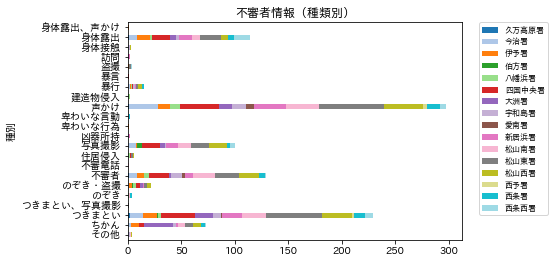

In [41]:
df4.plot.barh(title="不審者情報（種類別）", stacked=True, cmap="tab20")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, fontsize=8)

# グラフを保存
plt.savefig("01.png", dpi=300, bbox_inches="tight")

## 管轄所別

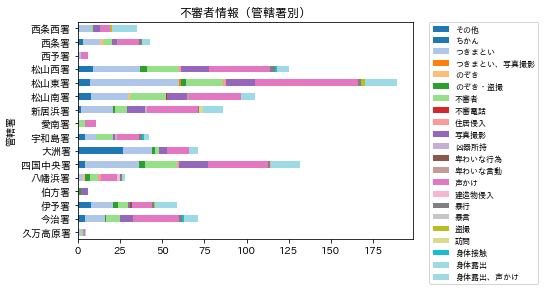

In [42]:
# 不審者情報（管轄署別）
df4.T.plot.barh(title="不審者情報（管轄署別）", stacked=True, cmap="tab20")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, fontsize=8)

# グラフを保存
plt.savefig("02.png", dpi=300, bbox_inches="tight")

## 曜日別

In [0]:
# 不審者情報（曜日別）
df5 = df1.pivot_table(
    values="場所", columns="曜日", index="種別", aggfunc="count", fill_value=0
)
df5 = df5.loc[:, ["月", "火", "水", "木", "金", "土", "日"]]

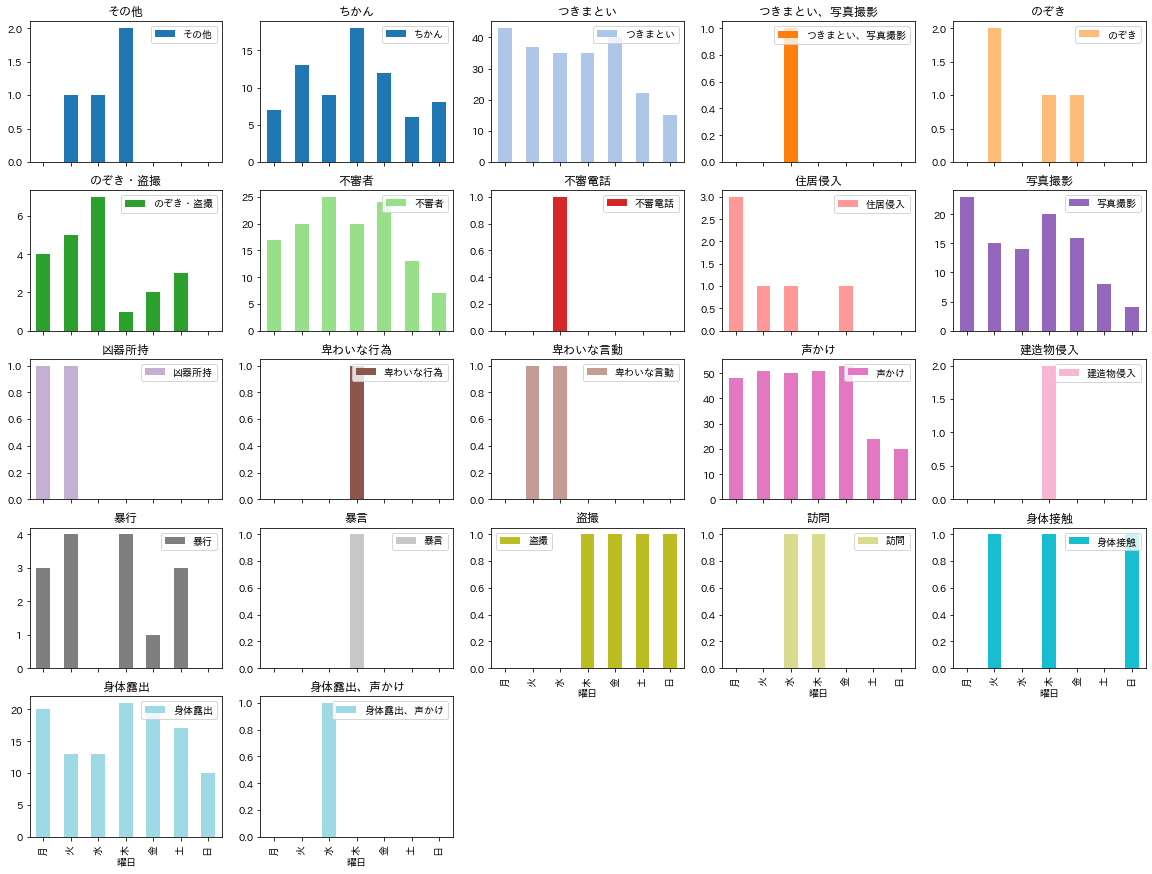

In [44]:
df5.T.plot.bar(subplots=True, layout=(5, 5), figsize=(20, 15), cmap="tab20")

# グラフを保存
plt.savefig("03.png", dpi=300, bbox_inches="tight")

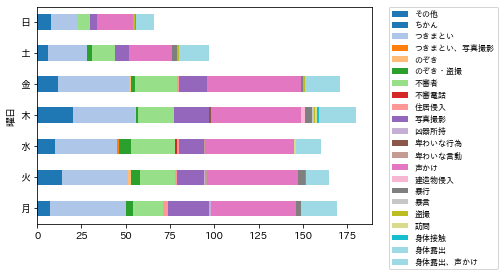

In [45]:
df5.T.plot.barh(stacked=True, cmap="tab20")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, fontsize=8)

# グラフを保存
plt.savefig("04.png", dpi=300, bbox_inches="tight")

## 時間別

In [46]:
# 不審者情報（時間別）
df6 = df1.pivot_table(
    values="場所", columns="時", index="種別", aggfunc="count", fill_value=0
)
df6

時,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
種別,,,,,,,,,,,,,,,,,,,,,,,,
その他,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0
ちかん,0,0,0,0,0,0,1,7,8,1,2,1,4,2,1,6,7,7,7,5,6,5,1,2
つきまとい,0,2,0,1,0,2,4,11,8,5,1,8,10,4,3,24,50,33,26,15,8,10,3,1
つきまとい、写真撮影,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
のぞき,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
のぞき・盗撮,0,0,0,0,0,0,0,0,4,0,1,0,0,1,1,2,0,1,1,2,4,2,2,1
不審者,0,2,1,4,0,1,1,7,7,2,3,5,5,4,9,10,25,16,8,9,3,2,2,3
不審電話,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
住居侵入,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,2,0,0,0


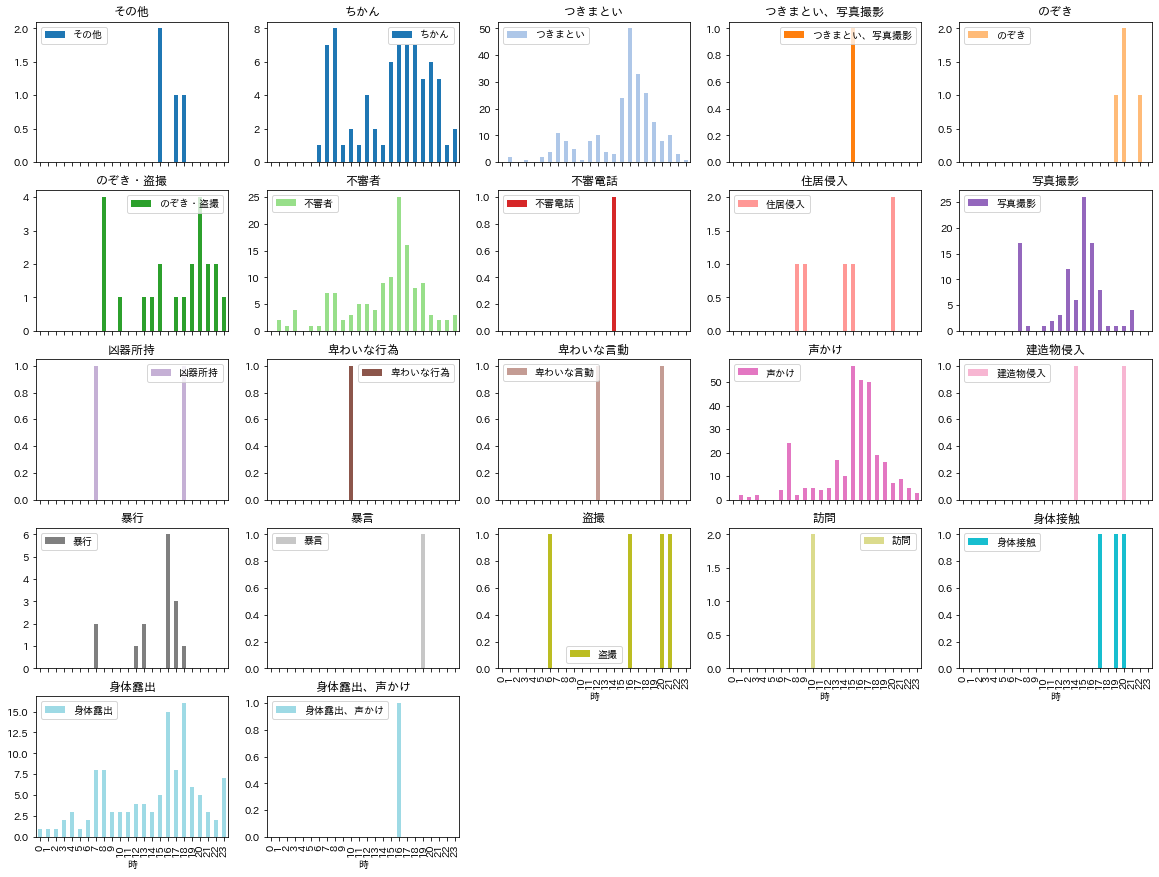

In [47]:
df6.T.plot.bar(subplots=True, layout=(5, 5), figsize=(20, 15), cmap="tab20")

# グラフを保存
plt.savefig("05.png", dpi=300, bbox_inches="tight")

## 月別

In [48]:
# 不審者情報（月別）
df7 = df1.pivot_table(
    values="場所", columns="月", index="種別", aggfunc="count", fill_value=0
)
df7

月,1,2,3,4,5,6,7,8,9,10,11,12
種別,,,,,,,,,,,,
その他,0,1,0,0,1,0,0,0,1,0,0,1
ちかん,7,8,6,12,2,2,4,6,6,11,7,2
つきまとい,17,18,14,26,17,23,19,11,29,24,24,7
つきまとい、写真撮影,0,0,0,0,0,0,0,0,0,0,0,1
のぞき,0,0,0,2,0,2,0,0,0,0,0,0
のぞき・盗撮,3,0,3,2,2,4,0,0,1,3,4,0
不審者,4,8,9,9,12,18,12,18,15,18,4,2
不審電話,0,0,0,0,0,1,0,0,0,0,0,0
住居侵入,1,1,0,0,0,2,0,1,0,1,0,0


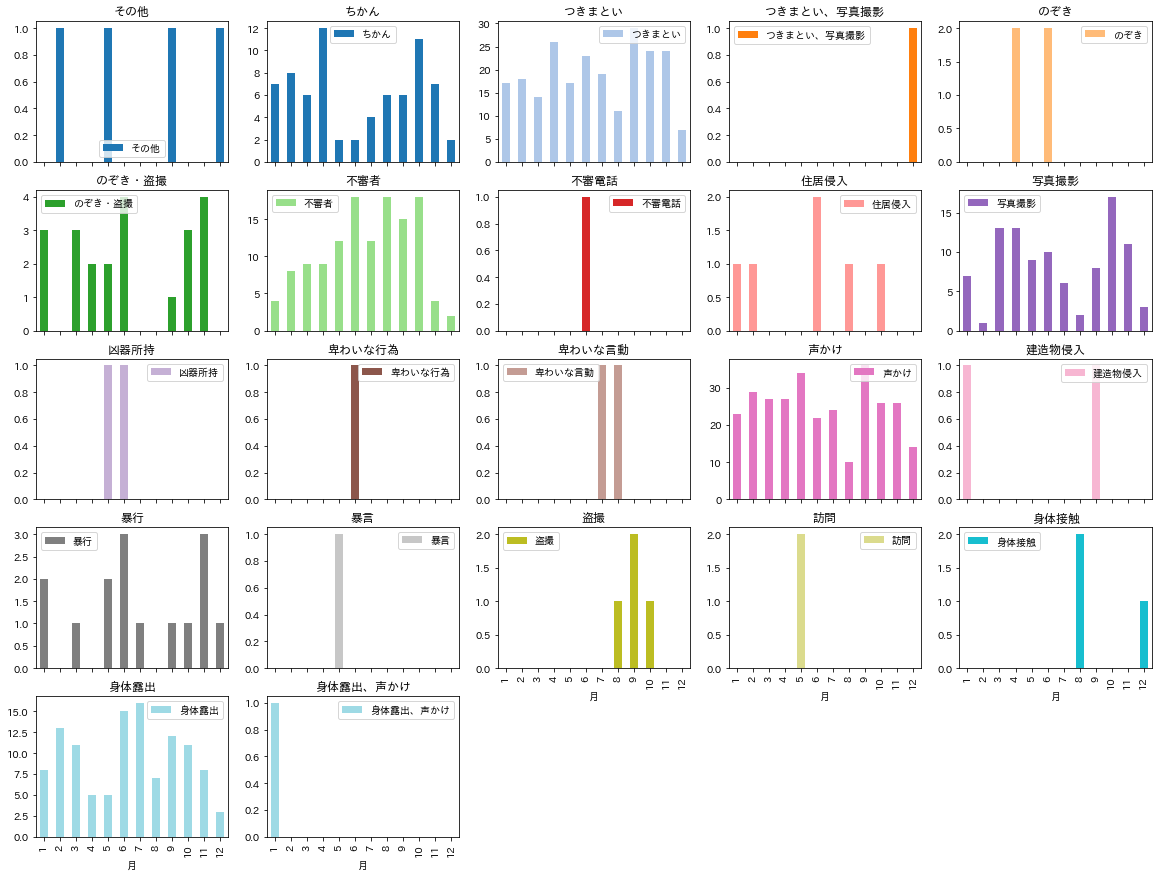

In [49]:
df7.T.plot.bar(subplots=True, layout=(5, 5), figsize=(20, 15), cmap="tab20")

# グラフを保存
plt.savefig("06.png", dpi=300, bbox_inches="tight")

## 年別

In [50]:
# 不審者情報（年別）
df8 = df1.pivot_table(
    values="場所", columns="年", index="種別", aggfunc="count", fill_value=0
)
df8

年,2017,2018,2019
種別,,,
その他,2,1,1
ちかん,30,29,14
つきまとい,92,52,85
つきまとい、写真撮影,0,1,0
のぞき,4,0,0
のぞき・盗撮,5,11,6
不審者,43,35,51
不審電話,1,0,0
住居侵入,2,1,3


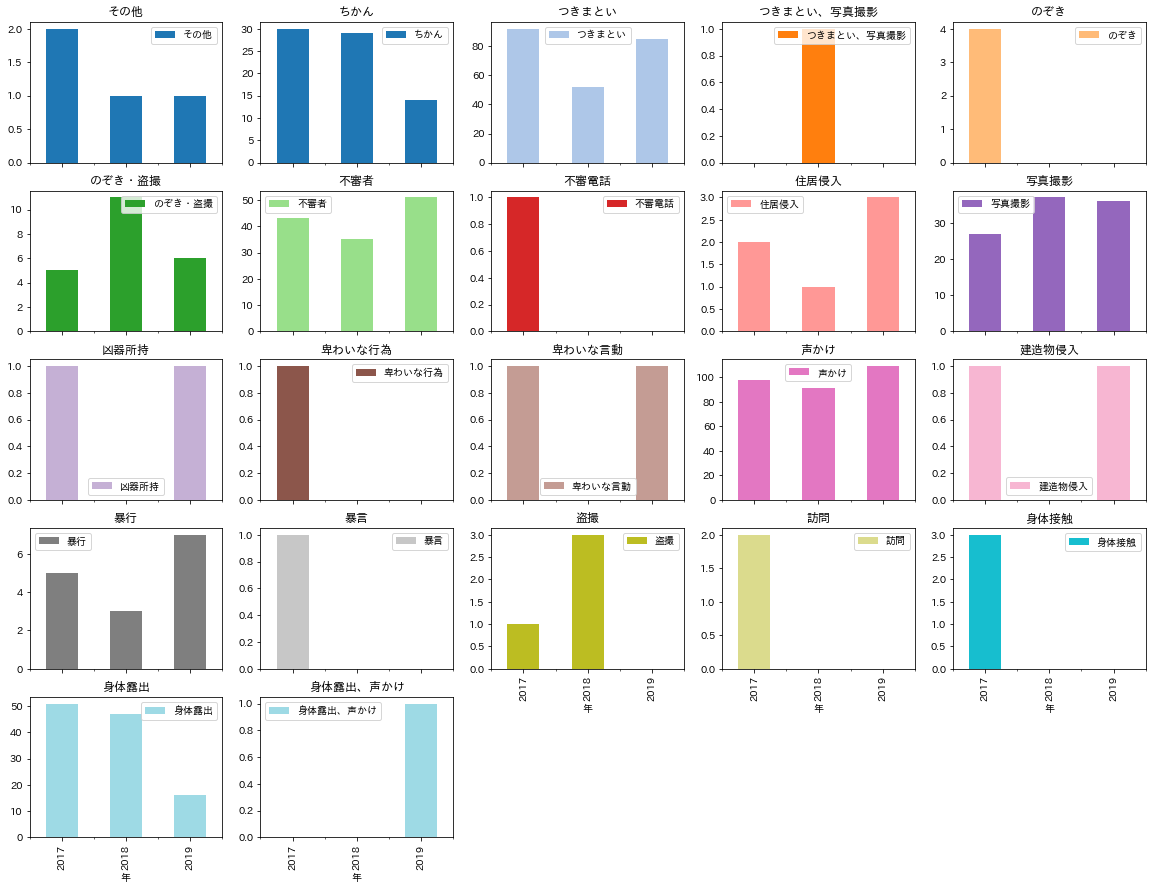

In [51]:
df8.T.plot.bar(subplots=True, layout=(5, 5), figsize=(20, 15), cmap="tab20")

# グラフを保存
plt.savefig("07.png", dpi=300, bbox_inches="tight")

# ワードクラウド

## janomeをインストール

In [52]:
!pip install janome

## ワードクラウドをインストール

In [53]:
!pip install wordcloud

In [0]:
from collections import Counter, defaultdict

from janome.tokenizer import Tokenizer
from wordcloud import WordCloud

## 分析する種別を選択

In [0]:
# 全体
df_type = df1

# 種別を選択
# df_type = df1[df1["種別"] == "写真撮影"]

## 用語をカウント

In [0]:
def counter(texts):

    t = Tokenizer()
    words_count = defaultdict(int)
    words = []

    for text in texts:
        tokens = t.tokenize(text)

        for token in tokens:
            # 品詞から名詞だけ抽出
            pos = token.part_of_speech.split(",")[0]

            if pos == "名詞":
                words_count[token.base_form] += 1
                words.append(token.base_form)

    return words_count, words

words_count, words = counter(df_type["状況"])
text = " ".join(words)

## 多い順に並び替え

In [0]:
s = pd.Series(words_count)

In [0]:
s.sort_values(ascending = False, inplace = True)

## 上位50件を表示

In [59]:
s.head(50)

)       1152
もの      1053
(        694
黒色       591
位        536
男        528
着用       453
ズボン      392
中        390
歳        342
様        312
声        310
色        259
自転車      252
所持       235
白色       224
身長       215
センチ      208
小学生      183
女子       172
中肉       146
40       146
等        144
帽        137
型        134
30       134
ところ      134
フォン      134
スマート     131
後方       129
上下       126
黒        123
灰色       122
眼鏡       122
車        121
徒歩       119
50       119
目撃       116
歩行       116
女児       114
短髪       114
長        109
170      105
女性       100
マスク       97
服         95
高校生       95
中学生       93
下半身       89
後         80
dtype: int64

## ファイルに保存

In [0]:
with open("analysis_text.txt", "w", encoding="utf-8") as fw:
    fw.write(text)

## ファイルを読込

In [0]:
with open("analysis_text.txt", "r", encoding="utf-8") as fr:
    text = fr.read()

## フォントのインストール先を指定

In [0]:
fpath = "/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf"

## 表示しない用語を指定

In [0]:
stop_words = ["身長", "所持", "着用", "容姿", "センチ", "もの", "ところ"]

## ワードクラウドを表示

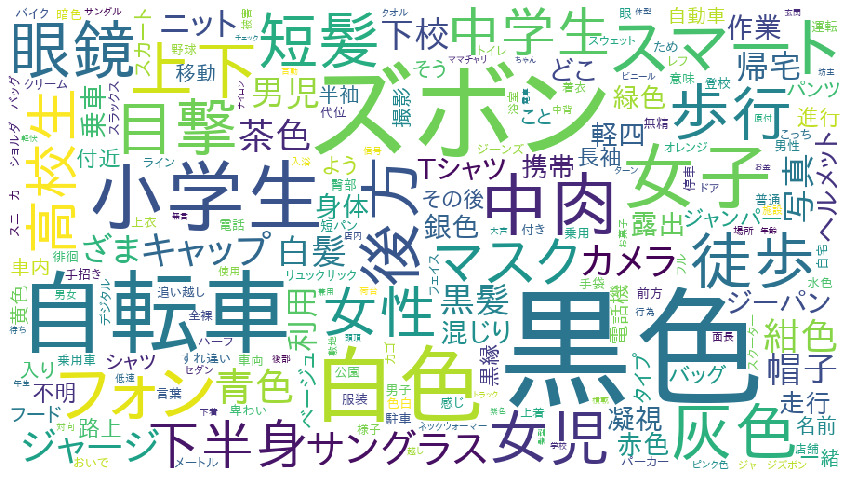

In [64]:
wordcloud = WordCloud(
    background_color="white",
    font_path=fpath,
    collocations=False,
    stopwords=set(stop_words),
    width=900,
    height=500,
).generate(text)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()